## Prediction of RNA–protein interactions using a nucleotide language model

[Prediction of RNA–protein interactions using a nucleotide language model](https://doi.org/10.1093/bioadv/vbac023)

### Abstract

The accumulation of sequencing data has enabled researchers to predict the interactions between RNA sequences and RNA-binding proteins (RBPs) using novel machine learning techniques. However, existing models are often difficult to interpret and require additional information to sequences. Bidirectional encoder representations from transformer (BERT) is a language-based deep learning model that is highly interpretable. Therefore, a model based on BERT architecture can potentially overcome such limitations. Here, we propose BERT-RBP as a model to predict RNA–RBP interactions by adapting the BERT architecture pretrained on a human reference genome. Our model outperformed state-of-the-art prediction models using the eCLIP-seq data of 154 RBPs. The detailed analysis further revealed that BERT-RBP could recognize both the transcript region type and RNA secondary structure only based on sequence information. Overall, the results provide insights into the fine-tuning mechanism of BERT in biological contexts and provide evidence of the applicability of the model to other RNA-related problems. Interactions between RNA sequences and RNA-binding proteins (RBPs) have a wide variety of roles in regulating cellular functions, including mRNA modification, splicing, translation and localization (Hentze et al., 2018). For instance, the T-cell-restricted intracellular antigen (TIA) family of proteins functions as alternative splicing regulators (Wang et al., 2010), and heterogeneous nuclear ribonucleoprotein K (hnRNPK) is a versatile regulator of RNA metabolism (Geuens et al., 2016). Numerous attempts have been made to identify RNA–RBP interactions to accurately capture their biological roles.

In [22]:
import warnings
from IPython.display import Image, display
warnings.filterwarnings(action='ignore')

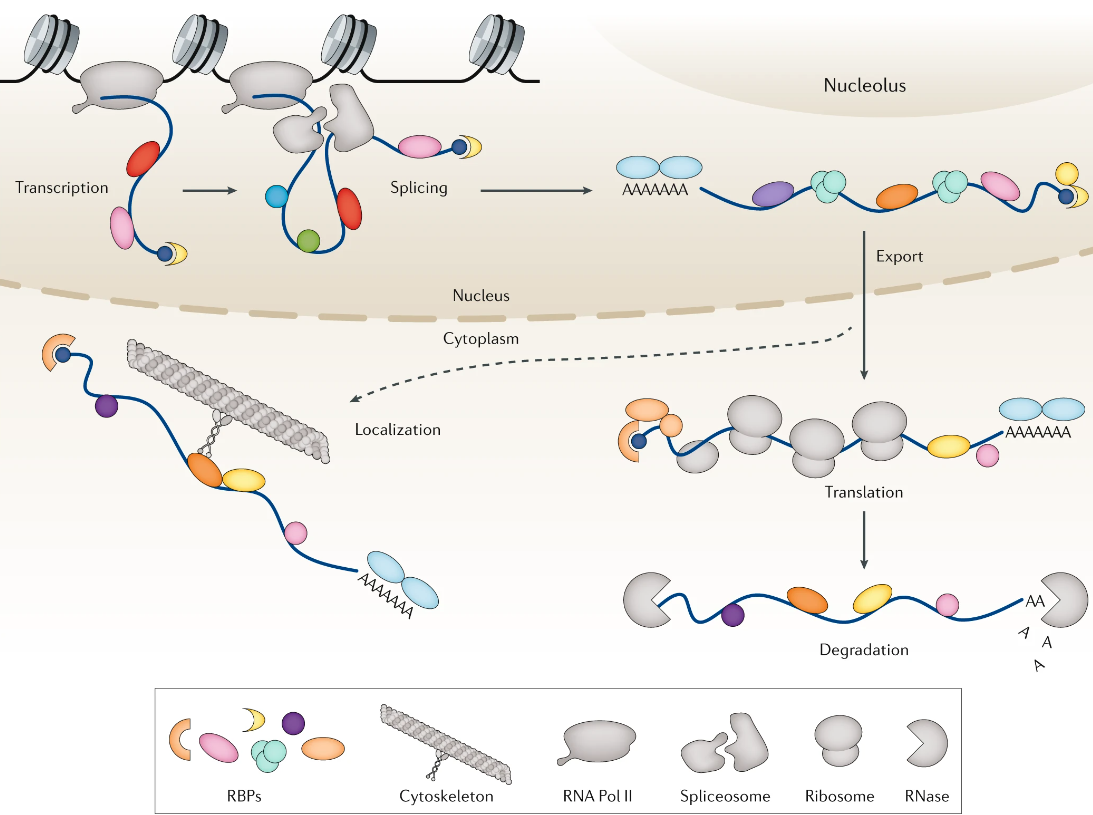

In [23]:
display(Image("figures/rnaprotein1.png"))

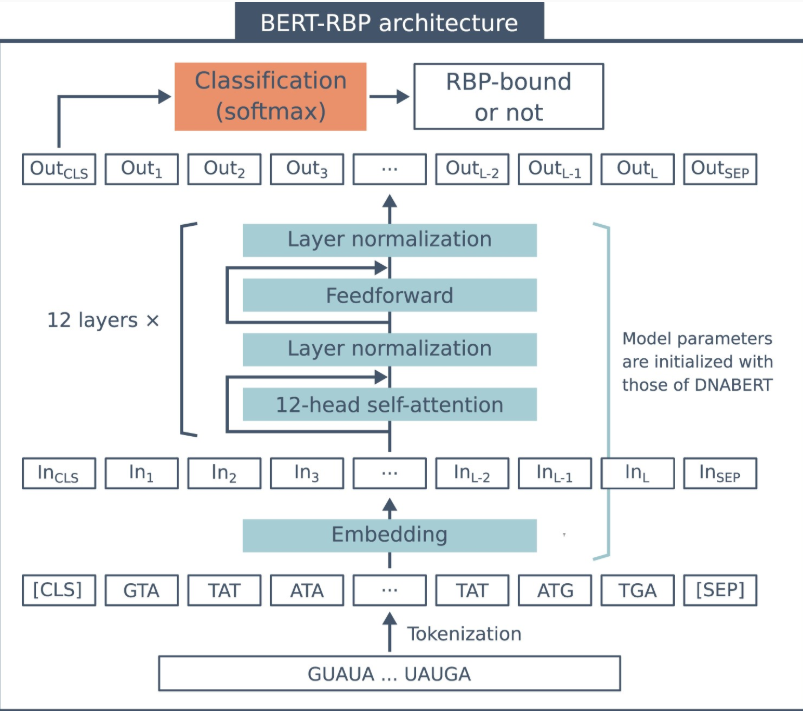

In [24]:
display(Image("figures/bert_rbp.png"))

The improvement of deep learning architectures largely buttresses progress in building better bioinformatics tools. In the field of natural language processing, self-attention-based deep learning architectures, such as transformer and bidirectional encoder representations from transformer (BERT), have achieved state-of-the-art performance in various tasks (Devlin et al., 2019; Vaswani et al., 2017). Additionally, BERT, which essentially consists of stacked transformer encoder layers, shows enhanced performance in downstream task-specific predictions after pretraining on a massive dataset (Devlin et al., 2019). In the field of bioinformatics, several BERT architectures pretrained on a massive corpus of protein sequences have been recently proposed, demonstrating their capability to decode the context of biological sequences (Elnaggar et al., 2021; Iuchi et al., 2021; Rao et al., 2019; Rives et al., 2021). In comparison to the protein language models, Ji et al. (2021) pretrained a BERT model, named DNABERT, on a whole human reference genome and demonstrated its broad applicability for predicting promoter regions, splicing sites and transcription factor binding sites upon fine-tuning. Thus, pretrained BERT models are potentially advantageous for a wide variety of bioinformatics tasks, including the prediction of RNA–RBP interactions.

In addition to its performance, BERT is highly interpretable and suitable for translating extended contextual information compared to conventional deep learning architectures, such as CNNs and long short-term memory (Rogers et al., 2020). Researchers in an emerging field, called BERTology, intend to elucidate how BERT learns contextual information by analyzing attention, which essentially represents the flow of information within a model (Vig and Belinkov, 2019). For instance, analysis of protein BERT models revealed that protein contact maps could be reconstructed from the attention of the model (Rao et al., 2021; Vig et al., 2021). This implies that, by analyzing the fine-tuned BERT model, we can reasonably explain the types of features that are crucial for predicting RNA–RBP interactions.

In this study, we applied the BERT model pretrained on a human reference genome to predict the RBP-binding property of RNA sequences. Our model, named BERT-RBP, outperformed existing state-of-the-art models as well as the baseline BERT model whose weight parameters were randomly initialized, showing the significance of pretraining on a large corpus. Attention analysis on the fine-tuned model further revealed that BERT-RBP could translate biological contexts, such as transcript region type and RNA secondary structure, only from RNA sequences. Thus, this study highlights the powerful capability of BERT in predicting RNA–RBP interactions and provides evidence of the architecture’s potential applicability to other bioinformatics problems.

## RBP dataset

http://www.csbio.sjtu.edu.cn/bioinf/RBPsuite/dataset_new.html#start

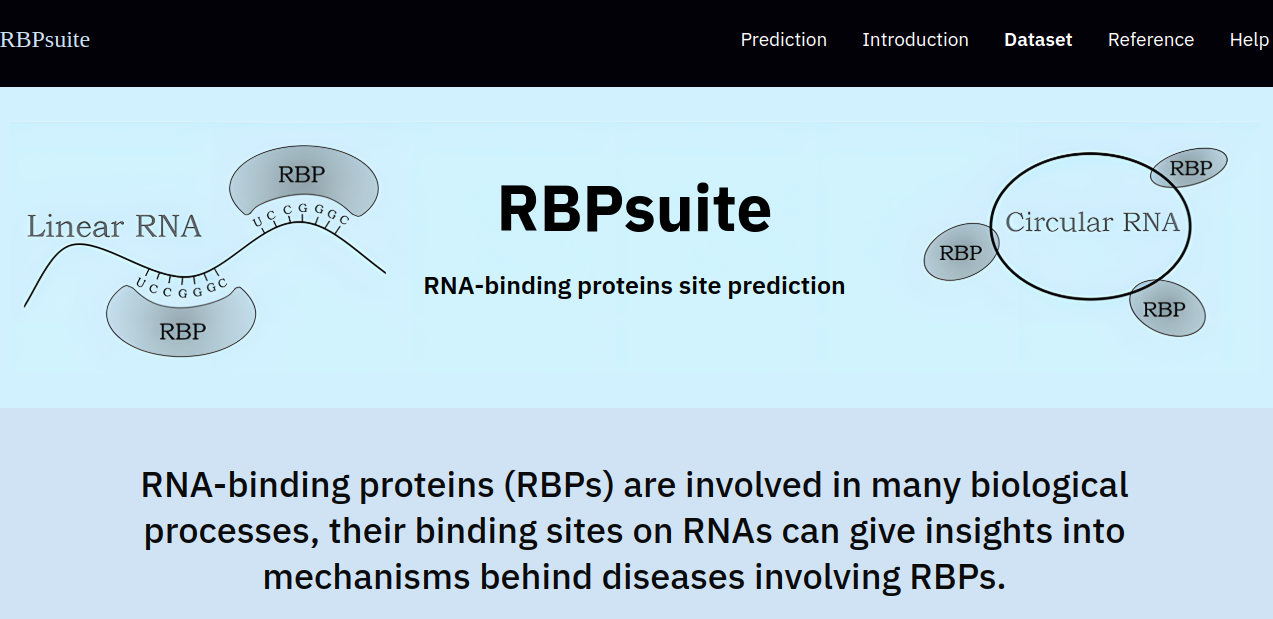

In [25]:
display(Image("figures/rbpsuite.png"))

## Generate datasets

In [26]:
import sys
import os
import numpy as np
import pandas as pd
import re

kmer = 3
max_num = 15000
test_ratio = 0.2
path_to_benchmarkfile = "rbp_bert/bert-rbp/datasets/benchmark"
OUTPUT_FILE = "original.tsv"
path_to_output = "rbp_bert/bert-rbp/show_datasets"

In [27]:

def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space

    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers


with open(path_to_benchmarkfile) as f:
    lines = f.readlines()
    print("Number of lines: {}".format(len(lines)))
    filename = 'EMPTY'
    i = 0
    while i < len(lines):
        line = lines[i]
        #print(line)
        if 'train_dir' in line:
            pattern = '([A-Z0-9]+.negative)|([A-Z0-9]+.positive)'
            filename = re.sub('[.]', '_', re.search(pattern, line).group())
            print(filename)
            value = 0
            if 'positive' in filename:
                value = 1
            filename = re.search('[A-Z0-9]+', filename).group()
            filepath = os.path.join(path_to_output, filename, OUTPUT_FILE)
            print(filepath)
            
            if os.path.exists(filepath):
                with open(filepath, mode='a') as f:
                    i += 1
                    flg = 0
                    while flg == 0:
                        if not '>' in lines[i]:
                            f.write(seq2kmer(re.sub('U', 'T', lines[i][:-1]), kmer) + '\t' +str(value) + '\n')
                        i += 1
                        if i >= len(lines):
                            break
                        elif 'train_dir' in lines[i]:
                            break
            else:
                if os.path.exists(path_to_output):
                    os.mkdir(path_to_output + '/' + filename)
                else:
                    os.mkdir(path_to_output)
                    os.mkdir(path_to_output + '/' + filename)
                with open(filepath, mode='w') as f:
                    f.write('sequence' + '\t' + 'label\n')
                    i += 1
                    flg = 0
                    while flg == 0:
                        if not '>' in lines[i]:
                            f.write(seq2kmer(re.sub('U', 'T', lines[i][:-1]), kmer) + '\t' + str(value) + '\n')
                        i += 1
                        if i >= len(lines):
                            break
                        elif 'train_dir' in lines[i]:
                            break
        
        else:
            print('ERROR : ', path_to_output)

Number of lines: 34082221
MTPAP_negative
rbp_bert/bert-rbp/show_datasets/MTPAP/original.tsv
TAF15_positive
rbp_bert/bert-rbp/show_datasets/TAF15/original.tsv
AKAP1_negative
rbp_bert/bert-rbp/show_datasets/AKAP1/original.tsv
HNRNPK_positive
rbp_bert/bert-rbp/show_datasets/HNRNPK/original.tsv
XRN2_negative
rbp_bert/bert-rbp/show_datasets/XRN2/original.tsv
NOLC1_positive
rbp_bert/bert-rbp/show_datasets/NOLC1/original.tsv
DDX59_negative
rbp_bert/bert-rbp/show_datasets/DDX59/original.tsv
IGF2BP3_negative
rbp_bert/bert-rbp/show_datasets/IGF2BP3/original.tsv
PABPN1_positive
rbp_bert/bert-rbp/show_datasets/PABPN1/original.tsv
SAFB_positive
rbp_bert/bert-rbp/show_datasets/SAFB/original.tsv
SFPQ_negative
rbp_bert/bert-rbp/show_datasets/SFPQ/original.tsv
SF3B4_positive
rbp_bert/bert-rbp/show_datasets/SF3B4/original.tsv
GTF2F1_positive
rbp_bert/bert-rbp/show_datasets/GTF2F1/original.tsv
WRN_positive
rbp_bert/bert-rbp/show_datasets/WRN/original.tsv
NIP7_positive
rbp_bert/bert-rbp/show_datasets/NIP7

In [28]:
random_seed = 0

def preprocess():
    orig_dir = "rbp_bert/bert-rbp/show_datasets" #os.path.join(args.path_to_output)
    dirlist = os.listdir(orig_dir)
    dirlist.sort()
    dirlist = ["TIAL1"]
    len_sequence_list = []
    for rbp in dirlist:
        one_sequence_list = []
        rbp_dir = os.path.join(orig_dir, rbp, OUTPUT_FILE)
        df_rbp = pd.read_csv(rbp_dir, sep='\t')
        df_rbp = df_rbp.dropna(axis=0)
        query = 'sequence.str.match("([ATGC]{'
        query += str(kmer)
        query += '}\s)+")'
        df_rbp = df_rbp.query(query)
        df_rbp = df_rbp.drop_duplicates(subset='sequence')
        pos = df_rbp[df_rbp['label']==1]
        if len(pos)>max_num:
            pos = pos.sample(n=max_num, random_state=random_seed)
        neg = df_rbp[df_rbp['label']==0]
        if len(neg)>max_num:
            neg = neg.sample(n=max_num, random_state=random_seed)
        # print(len(df_rbp), len(pos), len(neg))
        test_pos = pos.sample(frac=test_ratio, random_state=random_seed)
        test_neg = neg.sample(frac=test_ratio, random_state=random_seed)
        tr_pos = pos[~pos.sequence.isin(test_pos.sequence)].dropna()
        tr_neg = neg[~neg.sequence.isin(test_neg.sequence)].dropna()
        # print(len(test_pos), len(test_neg), len(tr_pos), len(tr_neg))
        df_test = pd.merge(test_pos, test_neg, how='outer').sample(frac=1, random_state=random_seed)
        # print(len(df_test))
        eval_pos = tr_pos.sample(frac=test_ratio, random_state=random_seed)
        eval_neg = tr_neg.sample(frac=test_ratio, random_state=random_seed)
        train_pos = tr_pos[~tr_pos.sequence.isin(eval_pos.sequence)].dropna()
        train_neg = tr_neg[~tr_neg.sequence.isin(eval_neg.sequence)].dropna()
        # print(len(eval_pos), len(eval_neg), len(train_pos), len(train_neg))
        df_eval = pd.merge(eval_pos, eval_neg, how='outer').sample(frac=1, random_state=random_seed)
        df_train = pd.merge(train_pos, train_neg, how='outer').sample(frac=1, random_state=random_seed)
        one_sequence_list.append([rbp, len(train_pos), len(train_neg), len(eval_pos), len(eval_neg), len(test_pos), len(test_neg), len(pos), len(neg)])
        len_sequence_list.extend(one_sequence_list)
        df_nontrain = df_rbp[~df_rbp.sequence.isin(df_train.sequence)].dropna()

        test_dir = os.path.join(orig_dir, rbp, 'test_sample_finetune')
        train_dir = os.path.join(orig_dir, rbp, 'training_sample_finetune')
        nontrain_dir = os.path.join(orig_dir, rbp, "nontraining_sample_finetune")
        if rbp == "TIAL1":
            print("{} Train".format(rbp))
            print(df_train)
            print("{} Eval".format(rbp))
            print(df_eval)
        if not os.path.isdir(test_dir):
            os.makedirs(test_dir)
        if not os.path.isdir(train_dir):
            os.makedirs(train_dir)
        if not os.path.isdir(nontrain_dir):
            os.makedirs(nontrain_dir)
        test_df_path = os.path.join(test_dir, "dev.tsv")
        df_test.to_csv(test_df_path, sep='\t', index=False)
        eval_df_path = os.path.join(train_dir, "dev.tsv")
        df_eval.to_csv(eval_df_path, sep='\t', index=False)
        train_df_path = os.path.join(train_dir, "train.tsv")
        df_train.to_csv(train_df_path, sep='\t', index=False)
        nontrain_df_path = os.path.join(nontrain_dir, "dev.tsv")
        df_nontrain.to_csv(nontrain_df_path, sep='\t', index=False)
        
preprocess()

TIAL1 Train
                                                sequence  label
12996  GTG TGA GAG AGC GCA CAG AGA GAG AGT GTG TGC GC...      1
5179   CAA AAG AGT GTG TGT GTA TAT ATT TTA TAA AAA AA...      1
10129  GAT ATC TCA CAG AGT GTG TGG GGG GGT GTT TTT TT...      1
14100  TAG AGA GAA AAG AGA GAG AGG GGC GCA CAG AGC GC...      0
17498  TTA TAT ATT TTC TCC CCC CCA CAA AAA AAG AGC GC...      0
...                                                  ...    ...
9225   GAA AAA AAA AAT ATC TCA CAG AGC GCT CTT TTT TT...      0
13123  GTG TGG GGA GAG AGG GGT GTT TTG TGC GCA CAG AG...      0
9845   GAG AGC GCA CAG AGA GAA AAT ATT TTG TGC GCA CA...      1
10799  GCC CCT CTA TAA AAA AAG AGT GTA TAG AGT GTT TT...      1
2732   AGA GAT ATG TGA GAA AAC ACA CAA AAG AGA GAG AG...      0

[19200 rows x 2 columns]
TIAL1 Eval
                                               sequence  label
2255  CTT TTT TTT TTT TTT TTA TAA AAA AAG AGA GAC AC...      0
608   AGA GAA AAC ACT CTG TGA GAT ATA TAT ATC TCG CG...  

### For complete dataset creation, run these steps in console

In [29]:
## Training data for TIAL1
df_TIAL1_training = pd.read_csv("rbp_bert/bert-rbp/datasets/TIAL1/training_sample_finetune/train.tsv", sep="\t")
df_TIAL1_training

,sequence,label
0,GTG TGA GAG AGC GCA CAG AGA GAG AGT GTG TGC GC...,1
1,CAA AAG AGT GTG TGT GTA TAT ATT TTA TAA AAA AA...,1
2,GAT ATC TCA CAG AGT GTG TGG GGG GGT GTT TTT TT...,1
3,TAG AGA GAA AAG AGA GAG AGG GGC GCA CAG AGC GC...,0
4,TTA TAT ATT TTC TCC CCC CCA CAA AAA AAG AGC GC...,0
...,...,...
19195,GAA AAA AAA AAT ATC TCA CAG AGC GCT CTT TTT TT...,0
19196,GTG TGG GGA GAG AGG GGT GTT TTG TGC GCA CAG AG...,0
19197,GAG AGC GCA CAG AGA GAA AAT ATT TTG TGC GCA CA...,1
19198,GCC CCT CTA TAA AAA AAG AGT GTA TAG AGT GTT TT...,1


In [30]:
## Test data for TIAL1
df_TIAL1_test = pd.read_csv("rbp_bert/bert-rbp/datasets/TIAL1/test_sample_finetune/dev.tsv", sep="\t")
df_TIAL1_test

,sequence,label
0,TAA AAA AAG AGT GTA TAT ATG TGT GTT TTA TAA AA...,1
1,CCA CAG AGG GGG GGC GCA CAT ATG TGA GAC ACC CC...,0
2,TTG TGT GTC TCA CAA AAA AAG AGA GAA AAG AGA GA...,1
3,ACA CAA AAT ATC TCC CCT CTT TTG TGG GGC GCT CT...,0
4,ATG TGC GCA CAT ATT TTT TTT TTA TAA AAA AAA AA...,0
...,...,...
5995,TCT CTG TGG GGC GCC CCT CTC TCA CAG AGT GTG TG...,0
5996,GCA CAA AAG AGG GGT GTT TTG TGT GTG TGA GAC AC...,1
5997,CAA AAT ATT TTT TTG TGA GAA AAG AGG GGG GGA GA...,1
5998,CTG TGA GAA AAA AAC ACA CAT ATC TCG CGG GGA GA...,0


### DNABERT

https://github.com/jerryji1993/DNABERT

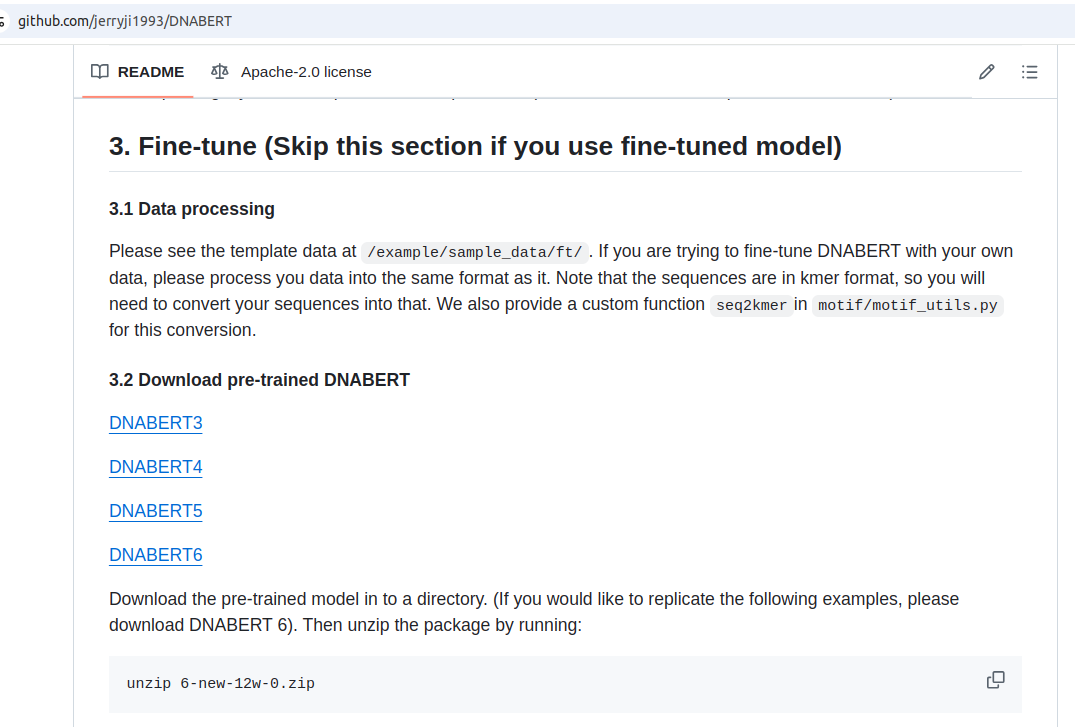

In [31]:
display(Image("figures/dnabert3.png"))

#### Download pretrained DNABERT 
https://github.com/jerryji1993/DNABERT

Path to DNABERT3: https://drive.google.com/file/d/1nVBaIoiJpnwQxiz4dSq6Sv9kBKfXhZuM/view
and store it under "../../dnabert3/"

%%bash
unzip 3-new-12w-0.zip -d .

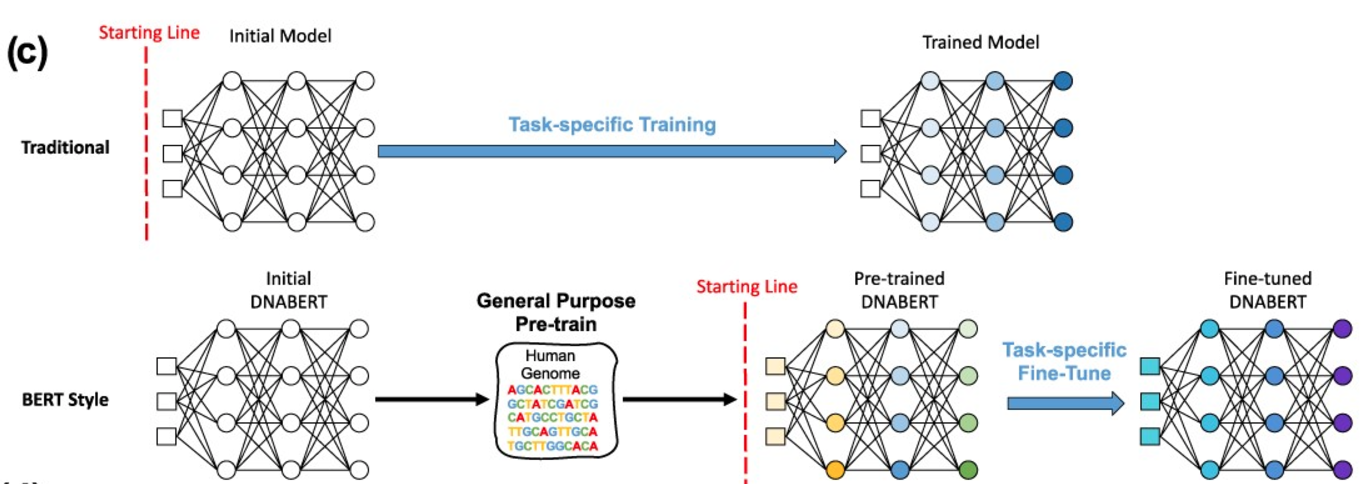

In [32]:
display(Image("figures/dnabert1.png"))
## BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding
## https://arxiv.org/pdf/1810.04805

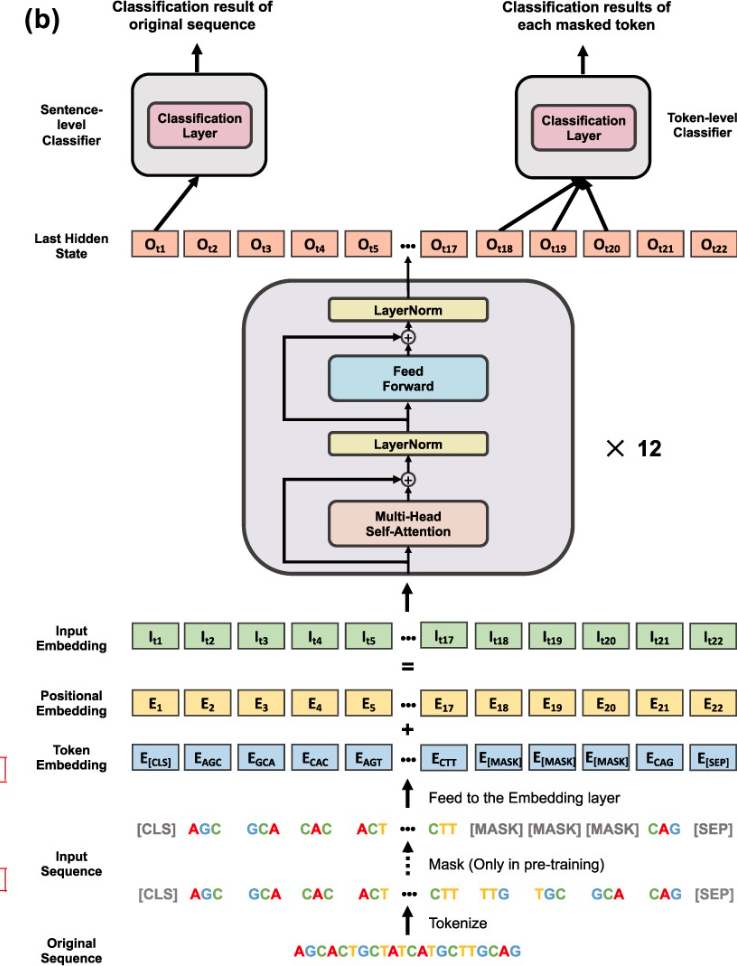

In [33]:
display(Image("figures/dnabert2.png"))
### https://doi.org/10.1093/bioinformatics/btab083

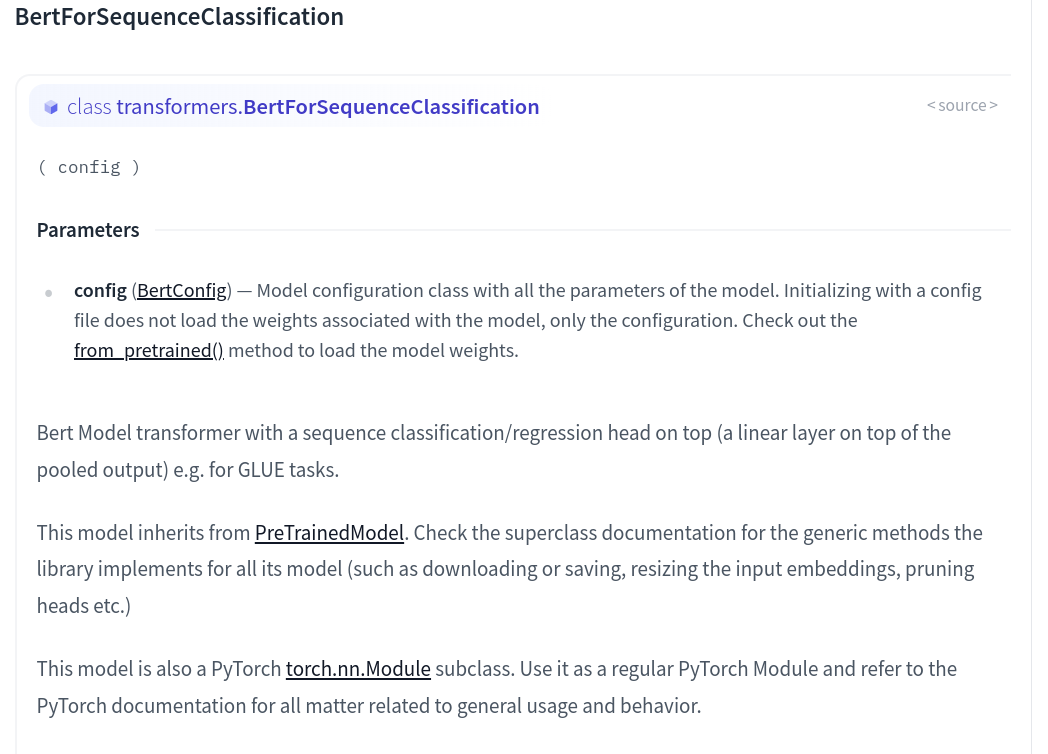

In [34]:
display(Image("figures/bertforseq1.png"))
### rbp_bert/bert-rbp/src/transformers_DNABERT/modeling_bert.py

#### Usage of BERT pre-trained model for sequence classification in an NLP task

In [35]:
import torch
from transformers import AutoTokenizer, BertForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("textattack/bert-base-uncased-yelp-polarity")
model = BertForSequenceClassification.from_pretrained("textattack/bert-base-uncased-yelp-polarity")

inputs = tokenizer("Hello, my dog is not cute", return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'LABEL_0'

In [36]:
inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]

'LABEL_1'

#### BertConfig

In [37]:
model.config ### rbp_bert/bert-rbp/src/transformers_DNABERT/configuration_bert.py

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "textattack/bert-base-uncased-yelp-polarity",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "finetuning_task": "yelp_polarity",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.46.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [38]:
#### DNATokenizer
## /rbp_bert/bert-rbp/src/transformers_DNABERT/tokenization_dna.py

In [39]:
dna_tokens = pd.read_csv("https://raw.githubusercontent.com/jerryji1993/DNABERT/master/src/transformers/dnabert-config/bert-config-3/vocab.txt")
dna_tokens

,[PAD]
0,[UNK]
1,[CLS]
2,[SEP]
3,[MASK]
4,AAA
...,...
63,GCG
64,GGA
65,GGT
66,GGC


In [ ]:
OrderedDict([('[PAD]', 0), ('[UNK]', 1), ('[CLS]', 2), ('[SEP]', 3), ('[MASK]', 4), ('AAA', 5), ('AAT', 6), ('AAC', 7), ('AAG', 8), ('ATA', 9), ('ATT', 10), ('ATC', 11), ('ATG', 12), ('ACA', 13), ('ACT', 14), ('ACC', 15), ('ACG', 16), ('AGA', 17), ('AGT', 18), ('AGC', 19), ('AGG', 20), ('TAA', 21), ('TAT', 22), ('TAC', 23), ('TAG', 24), ('TTA', 25), ('TTT', 26), ('TTC', 27), ('TTG', 28), ('TCA', 29), ('TCT', 30), ('TCC', 31), ('TCG', 32), ('TGA', 33), ('TGT', 34), ('TGC', 35), ('TGG', 36), ('CAA', 37), ('CAT', 38), ('CAC', 39), ('CAG', 40), ('CTA', 41), ('CTT', 42), ('CTC', 43), ('CTG', 44), ('CCA', 45), ('CCT', 46), ('CCC', 47), ('CCG', 48), ('CGA', 49), ('CGT', 50), ('CGC', 51), ('CGG', 52), ('GAA', 53), ('GAT', 54), ('GAC', 55), ('GAG', 56), ('GTA', 57), ('GTT', 58), ('GTC', 59), ('GTG', 60), ('GCA', 61), ('GCT', 62), ('GCC', 63), ('GCG', 64), ('GGA', 65), ('GGT', 66), ('GGC', 67), ('GGG', 68)])

#### Train a BERT-baseline model

In [ ]:
python3 $PYTHON_PATH --model_type dna --tokenizer_name dna$KMER --model_name_or_path $MODEL_PATH --task_name dnaprom 
                     --data_dir $DATA_PATH --output_dir $OUTPUT_PATH --do_train --do_train_from_scratch --max_seq_length 101 
                     --per_gpu_eval_batch_size 32 --per_gpu_train_batch_size 32 --learning_rate 2e-4 --num_train_epochs 3 --logging_steps 200 
                     --warmup_percent 0.1 --hidden_dropout_prob 0.1 --overwrite_output_dir --weight_decay 0.01 --n_process 8

#### Train a BERT-RBP model

In [ ]:
python3 $PYTHON_PATH --model_type dna --tokenizer_name dna$KMER --model_name_or_path $MODEL_PATH --task_name dnaprom 
                     --data_dir $DATA_PATH --output_dir $OUTPUT_PATH --do_train --max_seq_length 101 --per_gpu_eval_batch_size 32
                     --per_gpu_train_batch_size 32 --learning_rate 2e-4 --num_train_epochs 3 --logging_steps 200 --warmup_percent 0.1
                     --hidden_dropout_prob 0.1 --overwrite_output_dir --weight_decay 0.01 --n_process 8

#### Annotations for TIAL1

##### Hint:  
Copy annotation of TIAL1 to ./datasets/TIAL1 from ./sample_dataset/TIAL1

#### Analyse region type

In [ ]:
sh analyze_regiontype.sh ../datasets/TIAL1/ ## baseline_model
sh analyze_regiontype.sh ../datasets/TIAL1/ ## finetuned_model

#### Run Tensorboard

In [41]:
!tensorboard --logdir=rbp_bert/bert-rbp/scripts/runs/Nov26_15-53-28_noblemole-84996

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.18.0 at http://localhost:6006/ (Press CTRL+C to quit)
^C


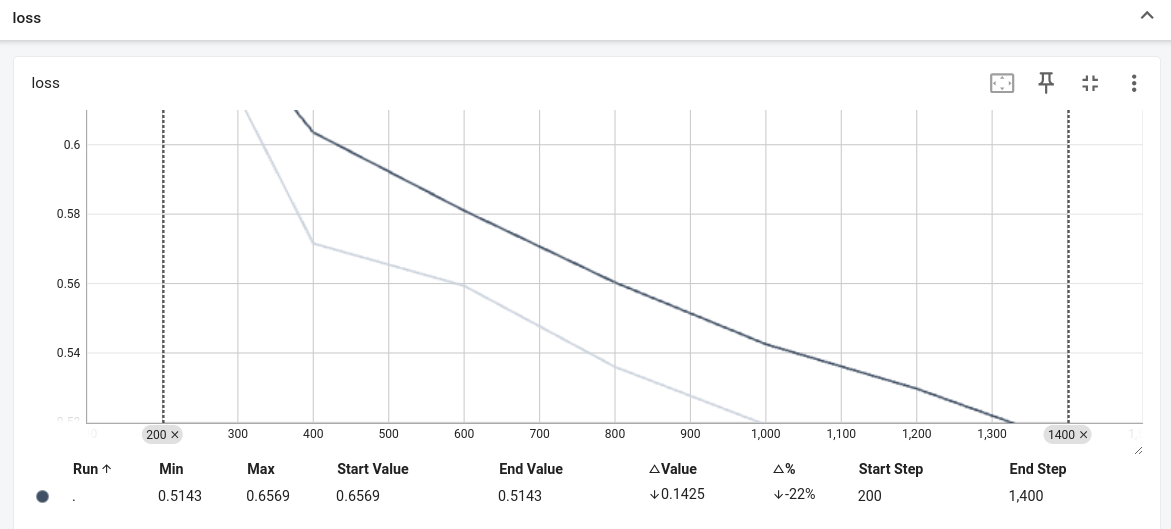

In [42]:
display(Image("figures/loss_bertbaseline.png"))

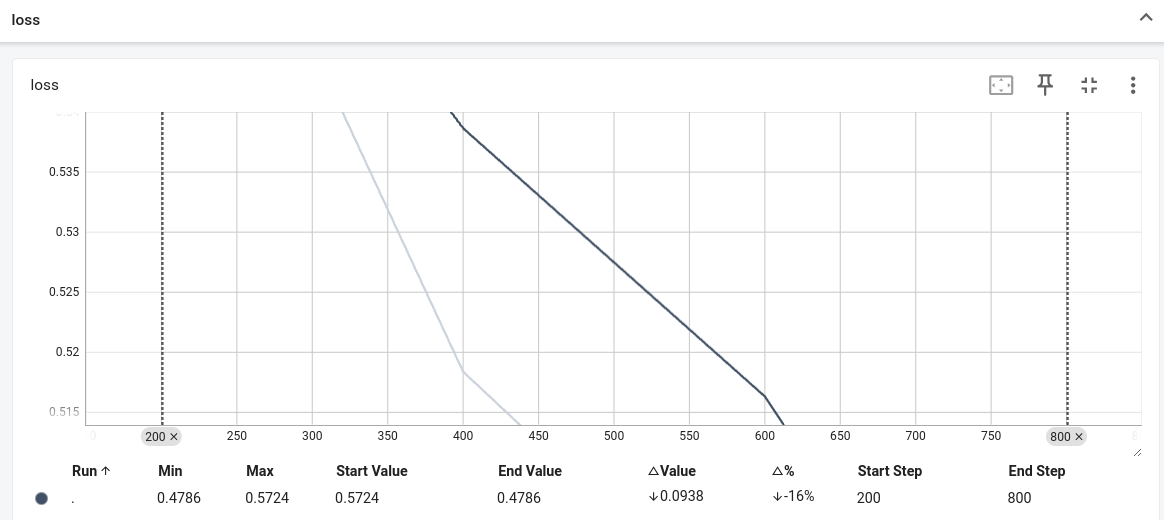

In [43]:
display(Image("figures/loss_bert_rpb.png"))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


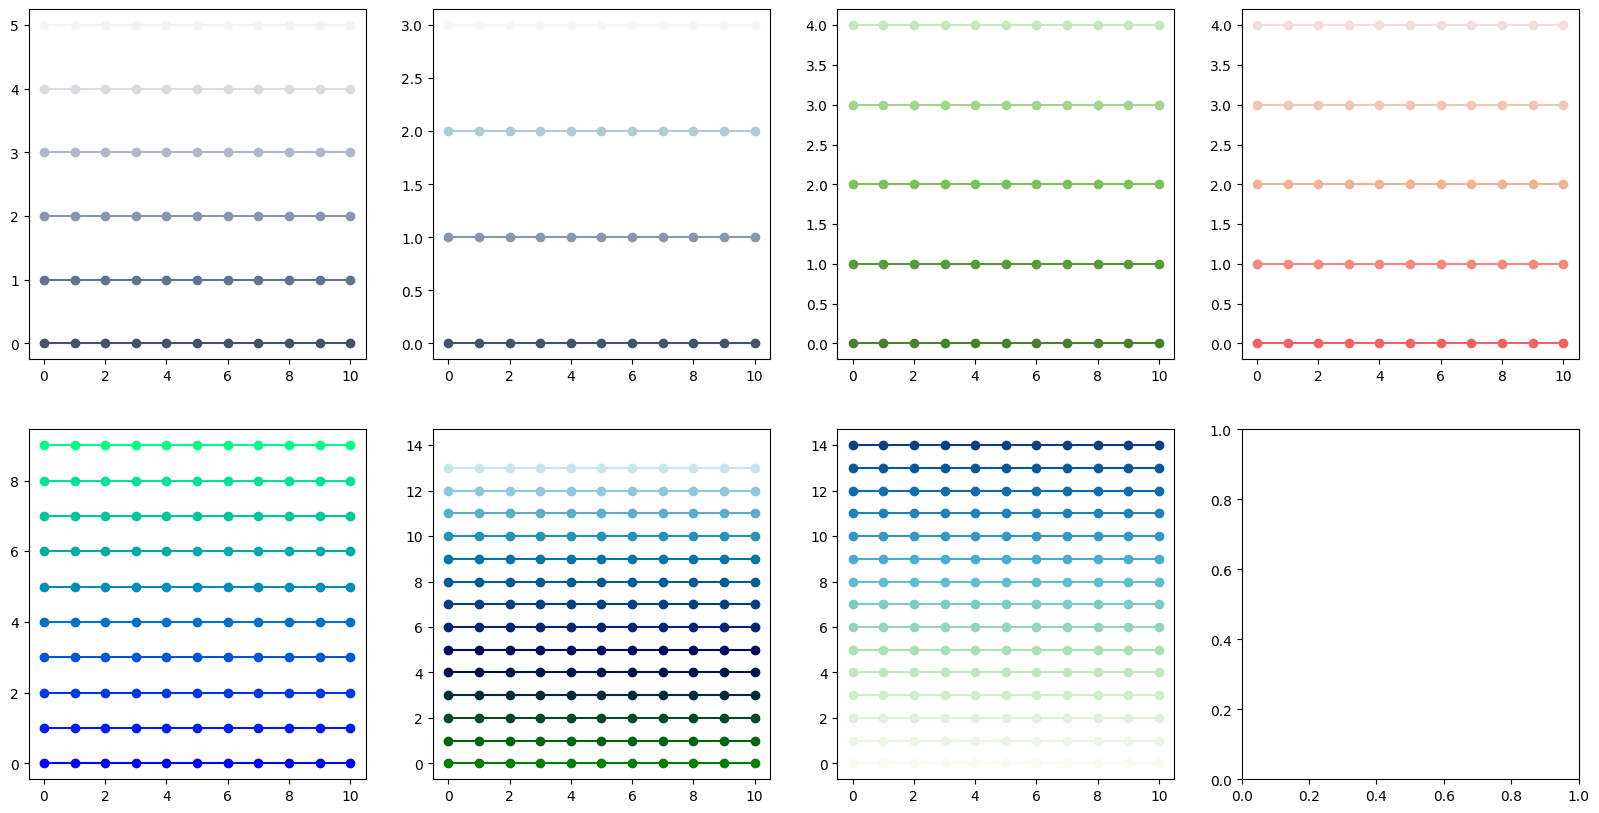

In [44]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import matthews_corrcoef, confusion_matrix, f1_score, roc_auc_score, auc, precision_recall_curve
import seaborn as sns
from scipy.stats import wilcoxon
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
#return manually defined colormap

def generate_cmap(colors):
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

clist_darkblue = ['#475267', '#63728e', '#8895ac', '#b0b8c8', '#d7dce3', '#f3f4f7']
clist_green = ['#49812f', '#579b38', '#79c257', '#a2d58b', '#c7e6b9']
clist_red = ['#F16262', '#f18a7c', '#F1B296', '#f1c7b7', '#F1DDD9']

clist_powerpoint = ['#475468', '#8797AD', '#AECCD4', '#F3F8F9']


fig, ax = plt.subplots(2,4,figsize=(20,10))
x = np.linspace(0,10,11)
for i in range(len(clist_darkblue)):
    y = np.full(len(x), i)
    ax[0,0].plot(x, y, marker='o', linestyle='-', color=clist_darkblue[i])

for i in range(len(clist_powerpoint)):
    y = np.full(len(x), i)
    ax[0,1].plot(x, y, marker='o', linestyle='-', color=clist_powerpoint[i])
    
for i in range(len(clist_green)):
    y = np.full(len(x), i)
    ax[0,2].plot(x, y, marker='o', linestyle='-', color=clist_green[i])
    
for i in range(len(clist_red)):
    y = np.full(len(x), i)
    ax[0,3].plot(x, y, marker='o', linestyle='-', color=clist_red[i])

clist_winter = []
cmap_winter = plt.get_cmap('winter',10)
for i in range(cmap_winter.N):
    y = np.full(len(x), i)
    ax[1,0].plot(x, y, marker='o', linestyle='-', color=cmap_winter(i))
    clist_winter.append(cmap_winter(i)[:-1])

clist_ocean = []
cmap_ocean = plt.get_cmap('ocean',15)
for i in range(cmap_ocean.N):
    y = np.full(len(x), i)
    ax[1,1].plot(x, y, marker='o', linestyle='-', color=cmap_ocean(i))
    clist_ocean.append(cmap_ocean(i)[:-1])

clist_gnbu = []
cmap_gnbu = plt.get_cmap('GnBu',15)
for i in range(cmap_gnbu.N):
    y = np.full(len(x), i)
    ax[1,2].plot(x, y, marker='o', linestyle='-', color=cmap_gnbu(i))
    clist_gnbu.append(cmap_gnbu(i)[:-1])

#bert_kmer_colors = np.array(clist_ocean[10:14][::-1])
#bert_kmer_swarms = np.tile(clist_powerpoint[0], 4)
bert_models_colors = [clist_gnbu[6],clist_gnbu[7], clist_gnbu[8], clist_gnbu[9], clist_ocean[10]]
bert_models_swarms = np.tile(clist_powerpoint[0], 5)
#print(np.array(clist_ocean[10]) * 255)

In [45]:
def set_custom_colormap(name: str, color_list: list):

    cmap_dis = mpl.colors.ListedColormap(color_list)
    cmap_seq = mpl.colors.LinearSegmentedColormap.from_list(name, color_list)

    plt.register_cmap(name + '_dis', cmap_dis)
    plt.register_cmap(name + '_dis_r', cmap_dis.reversed())
    plt.register_cmap(name + '_seq', cmap_seq)
    plt.register_cmap(name + '_seq_r', cmap_seq.reversed())
    return

COLORMAP_SOURCE_DICT = {

    'bertrbp_single_graphprot': ['#FFFFFF', '#a3f5f5'], #light blue
    'bertrbp_single_ideepS': ['#FFFFFF', '#f4e7b2'], #cream yellow
    'bertrbp_single_hocnnlb': ['#FFFFFF', '#95D6BB'], #faded green
    'bertrbp_single_baseline': ['#bff9f9','#FFFFFF','#F16262'], #red f47f7f
    #'bertrbp_single_bertrbp': ['#e8a38c', '#f7e0d9','#FFFFFF', '#2083a4', '#175e75'], #blue 3db2d9
    'bertrbp_single_bertrbp': ['#adadad','#fcfcfc', '#fb5d0e'], #blue 3db2d9 #e69166
    'bertrbp_single_bertbaseline': ['#adb9ca','#fcfcfc', '#50d284'], #blue 3db2d9 
    'bertrbp_single_bertdnabert': ['#adadad','#fcfcfc', '#61ccef'], #blue 3db2d9
    #'bertrbp_single_bertrbp_corr': ['#b2e0f0','#fcfcfc', '#F16262'], #blue 3db2d9
    'bertrbp_single_bertrbp_corr': ['#93cee1','#fcfcfc', '#e86868'], #blue 3db2d9
    'bertrbp_single_bertrbp2': ['#fcfcfc', '#fb5d0e'], #blue 3db2d9
    'bertrbp_single_bertrbp3': ['#fcfcfc', '#44546a'], #blue 3db2d9
    'bertrbp_single_dnabert': ['#e0b4d8', '#FFFFFF', '#47ad59'], #green 54B967

    'bertrbp_accent': ['#51a0c8', '#5ea77e', '#9ff9f9', '#89e1ac', '#fc8b52', '#FFFFFF'],
    'bertrbp_accent2': ['#f4e7b2', '#95D6BB', '#f47f7f', '#3db2d9', '#47ad59', '#FFFFFF'],
    
}

# colormap
for name, color_list in COLORMAP_SOURCE_DICT.items():
    set_custom_colormap(name, color_list)


DEFAULT_COLORMAP = 'bertrbp_accent_dis'

sns.set()
sns.set_palette(DEFAULT_COLORMAP)

In [85]:
#MASTER_DIR = "./datasets"
#MASTER_DIR = "./sample_dataset"
MASTER_DIR_DNABERT = "dnabert3/3-new-12w-0/"
MASTER_DIR = "rbp_bert/bert-rbp/datasets"

In [47]:
rbps = ('TIAL1',)
regiontypes = ("5'UTR", "3'UTR", "intron", "CDS")
index_regiontypes = {"5'UTR":0, "3'UTR":1, "intron":3, "CDS":4}
SUBDIR = "finetuned_model/analyze_regiontype"
SUBDIR_BASELINE = "baseline_model/analyze_regiontype" # if you have trained the BERT-baseline
VISUALIZE = True

rbp_bert/bert-rbp/datasets/TIAL1/baseline_model/analyze_regiontype/analyze_regiontype_type0.npy


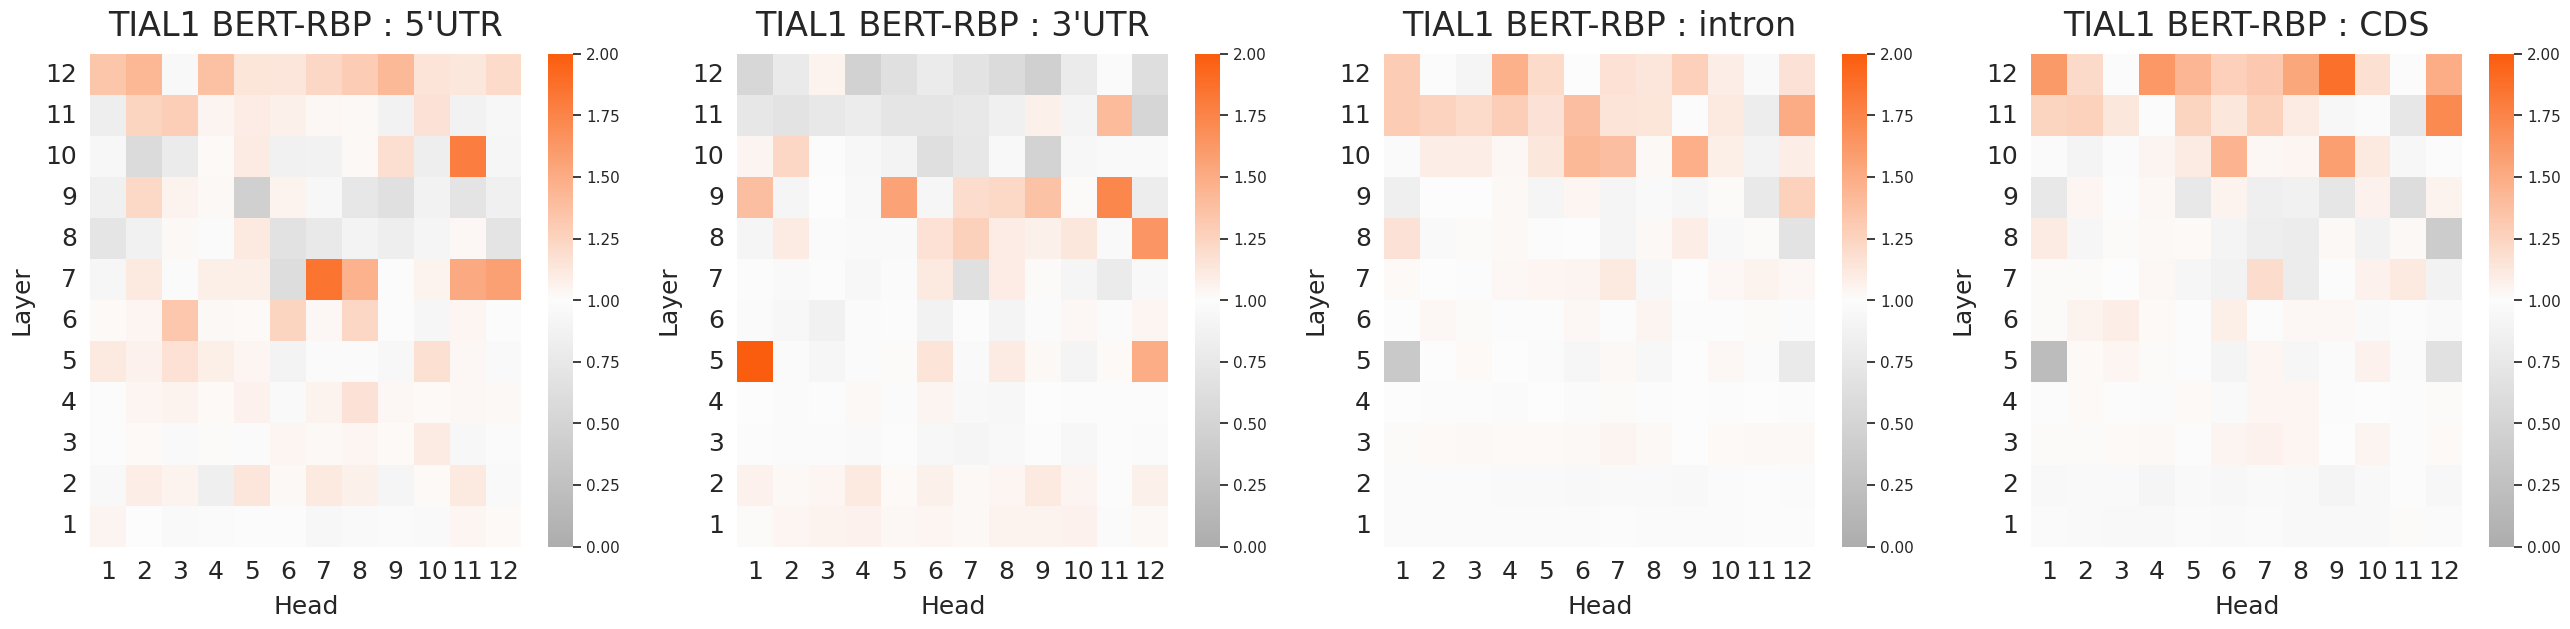

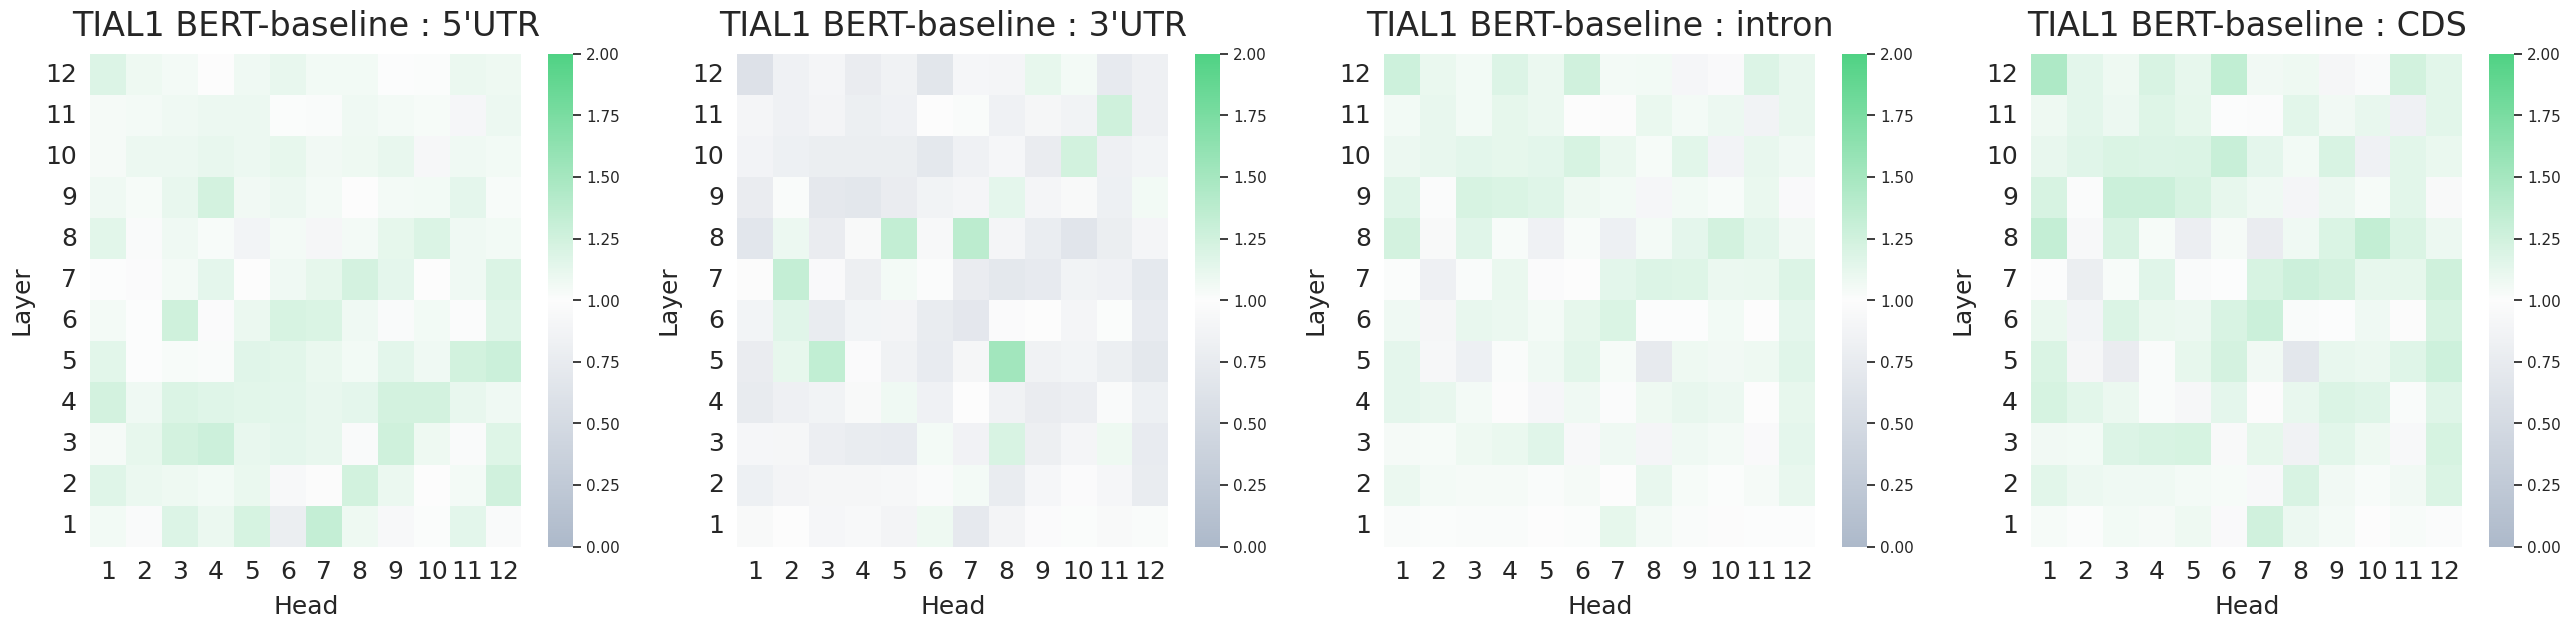

In [48]:
ax_i = len(rbps)
if ax_i < 2:
    ax_i = 1
ax_j = len(regiontypes)
heatmap_xlabels = list(map(int, np.linspace(1,12,12)))
heatmap_ylabels = heatmap_xlabels[::-1]

for rbp in rbps:
    fig, ax = plt.subplots(ax_i, ax_j, figsize=(ax_j*8, 6.4))
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_regiontype_type0.npy")
    regiontype_matrix = np.load(filename)
    for num_region, regiontype in enumerate(regiontypes):
        index = index_regiontypes[regiontype]
        sns.heatmap(np.flip(regiontype_matrix[index], axis=0), ax =ax[num_region],\
                            center=1.0, cmap='bertrbp_single_bertrbp_seq', vmin=0.0, vmax=2.0)
        ax[num_region].set_xlabel("Head", fontsize=18, labelpad=8)
        ax[num_region].set_ylabel("Layer", fontsize=18, labelpad=8)
        ax[num_region].set_xticklabels(heatmap_xlabels)
        ax[num_region].set_yticklabels(heatmap_ylabels)
        ax[num_region].tick_params(axis = 'x', labelsize =18)
        ax[num_region].tick_params(axis = 'y', labelsize =18, rotation=0)
        ax[num_region].set_title("{} BERT-RBP : {}".format(rbp, regiontype), fontsize=24, x=0.5, y=1.02)
        fig.patch.set_alpha(0)
        fig.savefig("heatmap_regiontype_specific_{}_{}.eps".format(rbp, regiontype), dpi=350)
    
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR_BASELINE, "analyze_regiontype_type0.npy")
    print(filename)
    if os.path.exists(filename):
        fig, ax = plt.subplots(ax_i, ax_j, figsize=(ax_j*8, 6.4))
        regiontype_matrix = np.load(filename)
        for num_region, regiontype in enumerate(regiontypes):
            index = index_regiontypes[regiontype]
            sns.heatmap(np.flip(regiontype_matrix[index], axis=0), ax =ax[num_region],\
                                center=1.0, cmap='bertrbp_single_bertbaseline_seq', vmin=0.0, vmax=2.0)
            ax[num_region].set_xlabel("Head", fontsize=18, labelpad=8)
            ax[num_region].set_ylabel("Layer", fontsize=18, labelpad=8)
            ax[num_region].set_xticklabels(heatmap_xlabels)
            ax[num_region].set_yticklabels(heatmap_ylabels)
            ax[num_region].tick_params(axis = 'x', labelsize =18)
            ax[num_region].tick_params(axis = 'y', labelsize =18, rotation=0)
            ax[num_region].set_title("{} BERT-baseline : {}".format(rbp, regiontype), fontsize=24, x=0.5, y=1.02)
            fig.patch.set_alpha(0)
            fig.savefig("heatmap_regiontype_specific_{}_{}_baseline.eps".format(rbp, regiontype), dpi=350)

### Analyse results


In [76]:
baseline_pred = np.load("rbp_bert/bert-rbp/datasets/TIAL1/baseline_model/pred_results.npy")
baseline_pred, baseline_pred.shape

(array([0.90644115, 0.14872465, 0.5951442 , ..., 0.9352021 , 0.17749968,
        0.88531756], dtype=float32),
 (6000,))

In [77]:
finetuned_pred = np.load("rbp_bert/bert-rbp/datasets/TIAL1/finetuned_model/pred_results.npy")
finetuned_pred, finetuned_pred.shape

(array([0.9602994 , 0.03656854, 0.19543697, ..., 0.98504573, 0.0248763 ,
        0.944971  ], dtype=float32),
 (6000,))

In [78]:
df_TIAL1_test_labels = df_TIAL1_test["label"]
lst_true_labels = df_TIAL1_test_labels.tolist()

In [79]:
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

threshold = 0.5
def compute_metrics(true, pred):
    binary_pred = (pred > threshold)
    accuracy = accuracy_score(true, binary_pred)
    precision = precision_score(true, binary_pred, average='weighted')
    recall = recall_score(true, binary_pred, average='weighted')
    f1 = f1_score(true, binary_pred, average='weighted')
    auroc = roc_auc_score(true, pred)
    return accuracy, precision, recall, f1, auroc

In [80]:
baseline_acc, baseline_prec, baseline_recall, baseline_f1, baseline_auc = compute_metrics(np.array(lst_true_labels), baseline_pred)
baseline_acc, baseline_prec, baseline_recall, baseline_f1, baseline_auc

(0.756, 0.7562515821088348, 0.756, 0.755940096852661, 0.8301393888888888)

In [81]:
finetuned_acc, finetuned_prec, finetuned_recall, finetuned_f1, finetuned_auc = compute_metrics(np.array(lst_true_labels), finetuned_pred)
finetuned_acc, finetuned_prec, finetuned_recall, finetuned_f1, finetuned_auc

(0.7693333333333333,
 0.7696828422969502,
 0.7693333333333333,
 0.7692585731110213,
 0.8461581666666668)

### Optional

#### RNA Structure analysis

In [ ]:
git clone https://github.com/LinearFold/LinearPartition
cd LinearPartition/
make

sh generate_2dstructure.sh ../datasets/TIAL1/ ../../../LinearPartition/

In [86]:
MASTER_DIR_DNABERT = "../3-new-12w-0/"
#MASTER_DIR = "../datasets"

In [87]:
rbps=("TIAL1",)
rbps=sorted(rbps)
structuretypes = ("F(dangling start)", "T(dangling end)", "I(internal loop)", "H(hairpin loop)", "M(multi loop)", "S(stem)")
SUBDIR = "finetuned_model/analyze_rnastructure"
SUBDIR_DNABERT = "baseline_model/analyze_rnastructure"

rbp_bert/bert-rbp/datasets/TIAL1/finetuned_model/analyze_rnastructure/analyze_rnastructure_type0.npy
rbp_bert/bert-rbp/datasets/TIAL1/baseline_model/analyze_rnastructure/analyze_rnastructure_type0.npy


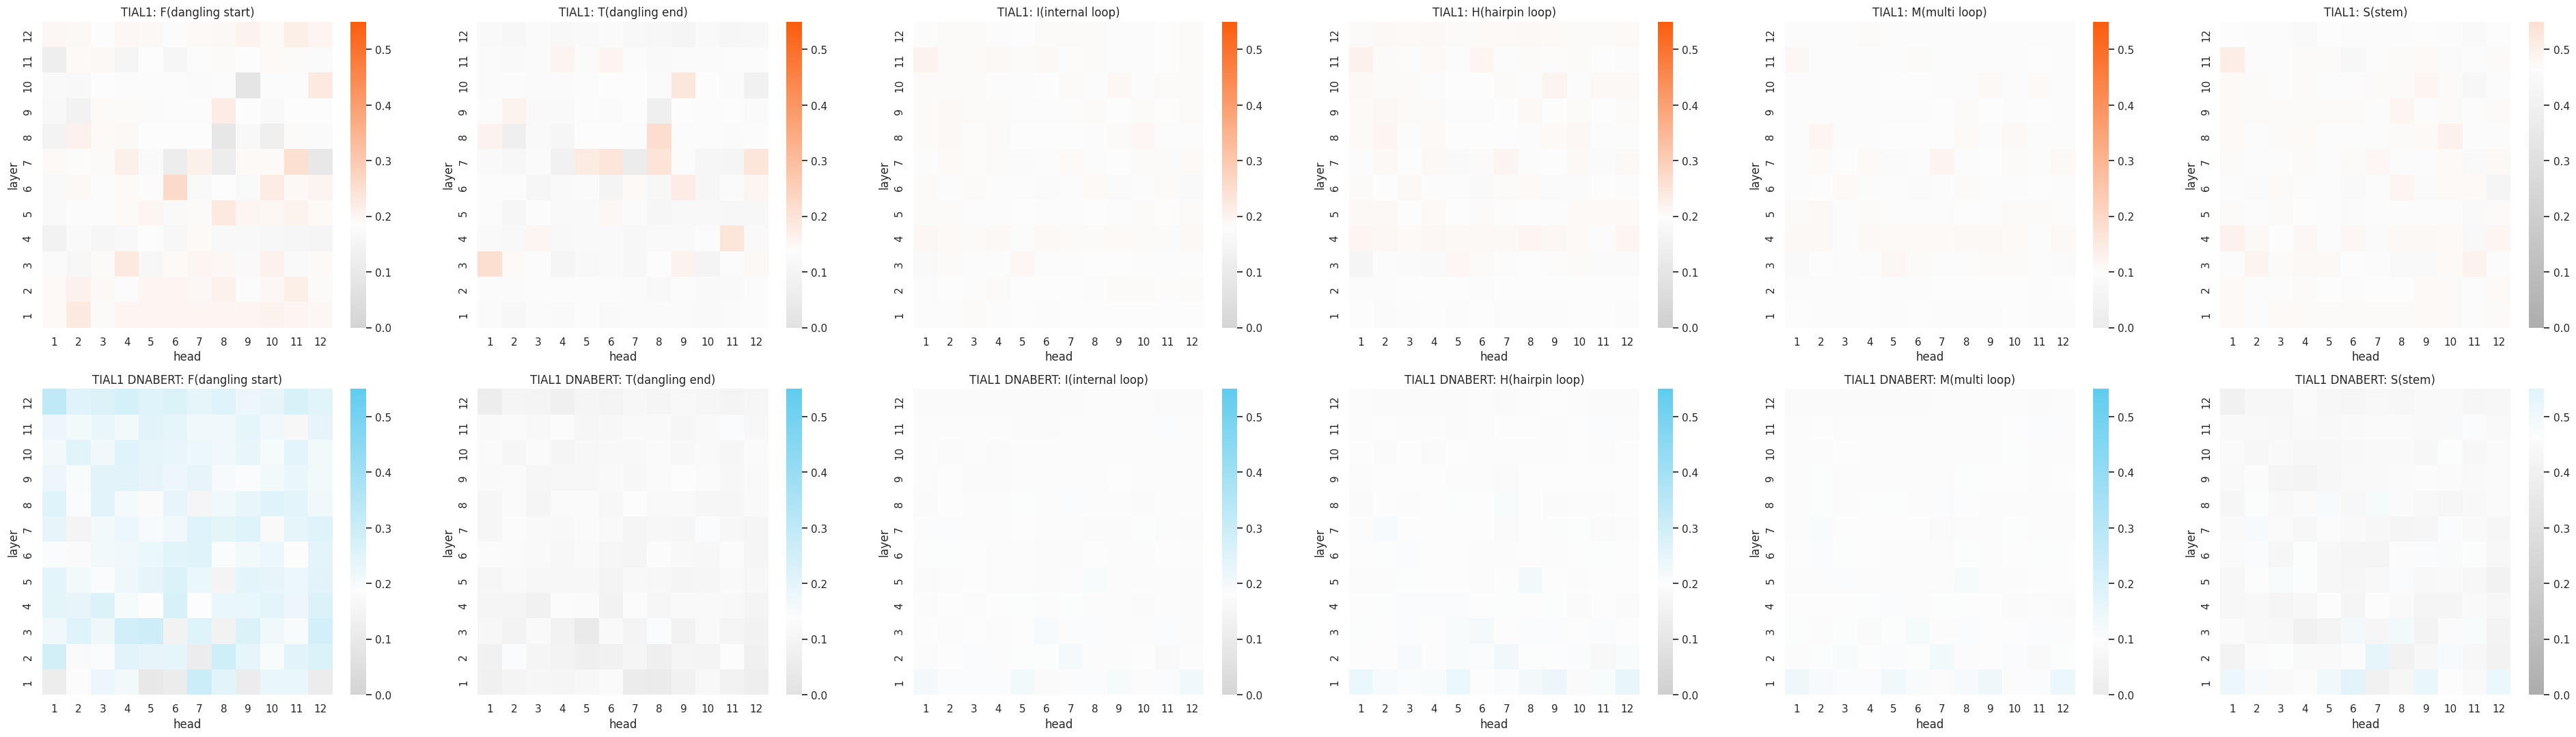

In [88]:
ax_i = 2
ax_j = len(structuretypes)
heatmap_xlabels = list(map(int, np.linspace(1,12,12)))
heatmap_ylabels = heatmap_xlabels[::-1]
minval = 0
maxval = 0.55

for num_rbp, rbp in enumerate(rbps):
    fig, ax = plt.subplots(ax_i, ax_j, figsize=(ax_j*8, ax_i*6.4))
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_rnastructure_type0.npy")
    print(filename)

    rnastructure_matrix = np.load(filename)
    filename2 = os.path.join(MASTER_DIR, rbp, SUBDIR_DNABERT, "analyze_rnastructure_type0.npy")
    print(filename2)
    if os.path.exists(filename2):
        rnastructure_matrix2 = np.load(filename2)
    
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_rnastructure_count_type0.npy")
    counts = np.load(filename)
    filename = os.path.join(MASTER_DIR, rbp, SUBDIR, "analyze_rnastructure_count_negative_type0.npy")
    counts = counts / (counts + np.load(filename))
    
    max_heads = []
    for i in range(len(structuretypes)):
        max_val = np.max(rnastructure_matrix[i])
        max_heads.append((np.where(rnastructure_matrix[i]==max_val)[0][0]+1, np.where(rnastructure_matrix[i]==max_val)[1][0]+1))
        sns.heatmap(np.flip(rnastructure_matrix[i], axis=0), ax =ax[0,i], \
                    cmap="bertrbp_single_bertrbp_seq", center=counts[i], vmin=minval, vmax=maxval)
        ax[0,i].set_xlabel("head")
        ax[0,i].set_ylabel("layer")
        ax[0,i].set_xticklabels(heatmap_xlabels)
        ax[0,i].set_yticklabels(heatmap_ylabels)
        ax[0,i].set_title("{}: {}".format(rbp, structuretypes[i]))
        if os.path.exists(filename2):
            sns.heatmap(np.flip(rnastructure_matrix2[i], axis=0), ax =ax[1,i], \
                        cmap="bertrbp_single_bertdnabert_seq", center=counts[i], vmin=minval, vmax=maxval)
        ax[1,i].set_xlabel("head")
        ax[1,i].set_ylabel("layer")
        ax[1,i].set_xticklabels(heatmap_xlabels)
        ax[1,i].set_yticklabels(heatmap_ylabels)
        ax[1,i].set_title("{} DNABERT: {}".format(rbp, structuretypes[i]))

    fig.patch.set_alpha(0)